In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
 
from pydrive.drive import GoogleDrive
 
from google.colab import auth
 
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
 
gauth = GoogleAuth()
 
gauth.credentials = GoogleCredentials.get_application_default()
 
drive = GoogleDrive(gauth)


In [ ]:
from google.colab import files
 
file_id = '1C7a1pG4hza8eK5oNSPtel8G3EwdUsjG_'
 
downloaded = drive.CreateFile({'id': file_id})
 
downloaded.GetContentFile('heartRisk.csv')

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
veri = pd.read_csv("heartRisk.csv")

In [ ]:
veri.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


In [ ]:
veri.info()
# Veri setimiz "Heart Risk" yani kalp krizi riskine ait gözlemler içermektedir.
# 10 nitelik ve 1000 gözlem bulunmaktadır.
# Niteliklerin hiçbirinde eksik değer bulunmamaktadır.
# Ayrıca niteliklerin tamamı sürekli değişken olarak tanımlanmıştır.
# 5 kategorik değişken ise label encoder ile int haline getilmiştir.
## (IsMale: 0 Female, 1 Male)
## (IsBalck: 0 Not Black, 1 Black)
## (IsSmoker: 0 Not Smoker, 1 Smoker)
## (IsDiabetic: 0 Not Diabetic, 1 Diabetic)
## (IsHypertensive: 0 Not Hypertensive, 1 Hypertensive)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isMale          1000 non-null   int64  
 1   isBlack         1000 non-null   int64  
 2   isSmoker        1000 non-null   int64  
 3   isDiabetic      1000 non-null   int64  
 4   isHypertensive  1000 non-null   int64  
 5   Age             1000 non-null   int64  
 6   Systolic        1000 non-null   int64  
 7   Cholesterol     1000 non-null   int64  
 8   HDL             1000 non-null   int64  
 9   Risk            1000 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 78.2 KB


In [ ]:
veri_yeni = veri.rename(columns={"isMale":"Cinsiyet_Erkek",
	"isBlack":"Siyahi",
  "isSmoker":"Sigara_Icen",
  "isDiabetic":"Diyabet_Hastasi",
  "isHypertensive":"Hipertansiyon_Hastasi",
  	"Age":"Yas",
    	"Systolic":"Sistolik",
      	"Cholesterol":"Kolestrol",
        	"HDL":"HDL",
          	"Risk":"Risk"})

In [ ]:
veri_yeni

,Cinsiyet_Erkek,Siyahi,Sigara_Icen,Diyabet_Hastasi,Hipertansiyon_Hastasi,Yas,Sistolik,Kolestrol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1
...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,42,110,175,67,3.9
996,0,1,0,1,0,75,123,130,56,23.9
997,1,1,1,0,1,76,178,179,30,61.3
998,0,1,1,1,0,65,139,169,66,32.3


In [ ]:
Q1 = veri_yeni.quantile(0.25) #birinci çeyreklik
Q3 = veri_yeni.quantile(0.75) #üçüncü çeyreklik
IQR = Q3-Q1

alt_sinir= Q1-(1.5*IQR)
ust_sinir= Q3+(1.5*IQR)

aykiri_degerler= (veri_yeni < alt_sinir) | (veri_yeni > ust_sinir)

In [ ]:
## aykırı değer tespiti yaptığımızda yalnızca kalp_krizi riskinde aykırı değer bulunmaktadır.
## Bu değerler yanlış girilmiş veya test hatası değerleri olabilir. 
## Değerleri silmek yerine risk niteliğinin çeyrekliklerinin alt ve üst sınırına baskılayalım.
veri_yeni[aykiri_degerler].count()

Cinsiyet_Erkek            0
Siyahi                    0
Sigara_Icen               0
Diyabet_Hastasi           0
Hipertansiyon_Hastasi     0
Yas                       0
Sistolik                  0
Kolestrol                 0
HDL                       0
Risk                     22
dtype: int64

In [ ]:
for col in veri_yeni:
  Q1 = veri_yeni[col].quantile(0.25)
  Q3 = veri_yeni[col].quantile(0.75)
  IQR = Q3-Q1

  alt_sinir= Q1-(1.5*IQR)
  ust_sinir= Q3+(1.5*IQR)

  #kolon == yeni_veri[[col]]

  veri_yeni[veri_yeni[[col]] < alt_sinir] = alt_sinir
  #alt_aykiri_toplam = aykiri_deger_alt.sum()
  veri_yeni[veri_yeni[[col]] > ust_sinir] = ust_sinir
  #ust_aykiri_toplam = aykiri_deger_ust.sum()
  
  #aykiri_deger_alt = alt_sinir
  #aykiri_deger_ust == ust_sinir 
  


In [ ]:
veri_yeni.loc[201, "Risk"]

20.4

In [ ]:
## Normallik Testleri
from scipy import stats


In [ ]:
for col in veri_yeni:
  p_deger= stats.shapiro(veri_yeni[col])
  alpha= 0.05

  if p_deger[1] < alpha:
    print(f"{col} niteliği normal dağılıma sahip değildir")
  else:
    print(f"{col} niteliği normal dağılıma sahiptir.")

Cinsiyet_Erkek niteliği normal dağılıma sahip değildir
Siyahi niteliği normal dağılıma sahip değildir
Sigara_Icen niteliği normal dağılıma sahip değildir
Diyabet_Hastasi niteliği normal dağılıma sahip değildir
Hipertansiyon_Hastasi niteliği normal dağılıma sahip değildir
Yas niteliği normal dağılıma sahip değildir
Sistolik niteliği normal dağılıma sahip değildir
Kolestrol niteliği normal dağılıma sahip değildir
HDL niteliği normal dağılıma sahip değildir
Risk niteliği normal dağılıma sahip değildir


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
veri_yeni_donusum = MinMaxScaler().fit_transform(veri_yeni)
veri_donusum_df = pd.DataFrame(veri_yeni_donusum, columns=["Cinsiyet_Erkek","Siyahi","Sigara_Icen","Diyabet_Hastasi","Hipertansiyon_Hastasi","Yas",
                                                            "Sistolik",
                                                            "Kolestrol",
                                                            "HDL",
                                                            "Risk"])

In [ ]:
veri_donusum_df.head()

,Cinsiyet_Erkek,Siyahi,Sigara_Icen,Diyabet_Hastasi,Hipertansiyon_Hastasi,Yas,Sistolik,Kolestrol,HDL,Risk
0,1.0,1.0,0.0,1.0,1.0,0.230769,0.100000,0.728571,0.1500,0.174742
1,0.0,0.0,0.0,1.0,1.0,0.743590,0.700000,0.357143,0.4875,0.476569
2,0.0,1.0,1.0,1.0,1.0,0.256410,0.827273,0.242857,0.4875,0.595711
3,1.0,1.0,1.0,1.0,0.0,0.051282,0.500000,0.514286,0.3250,0.208102
4,0.0,0.0,1.0,0.0,1.0,0.666667,0.400000,0.985714,0.5375,0.238284


**Regresyon Analizi**

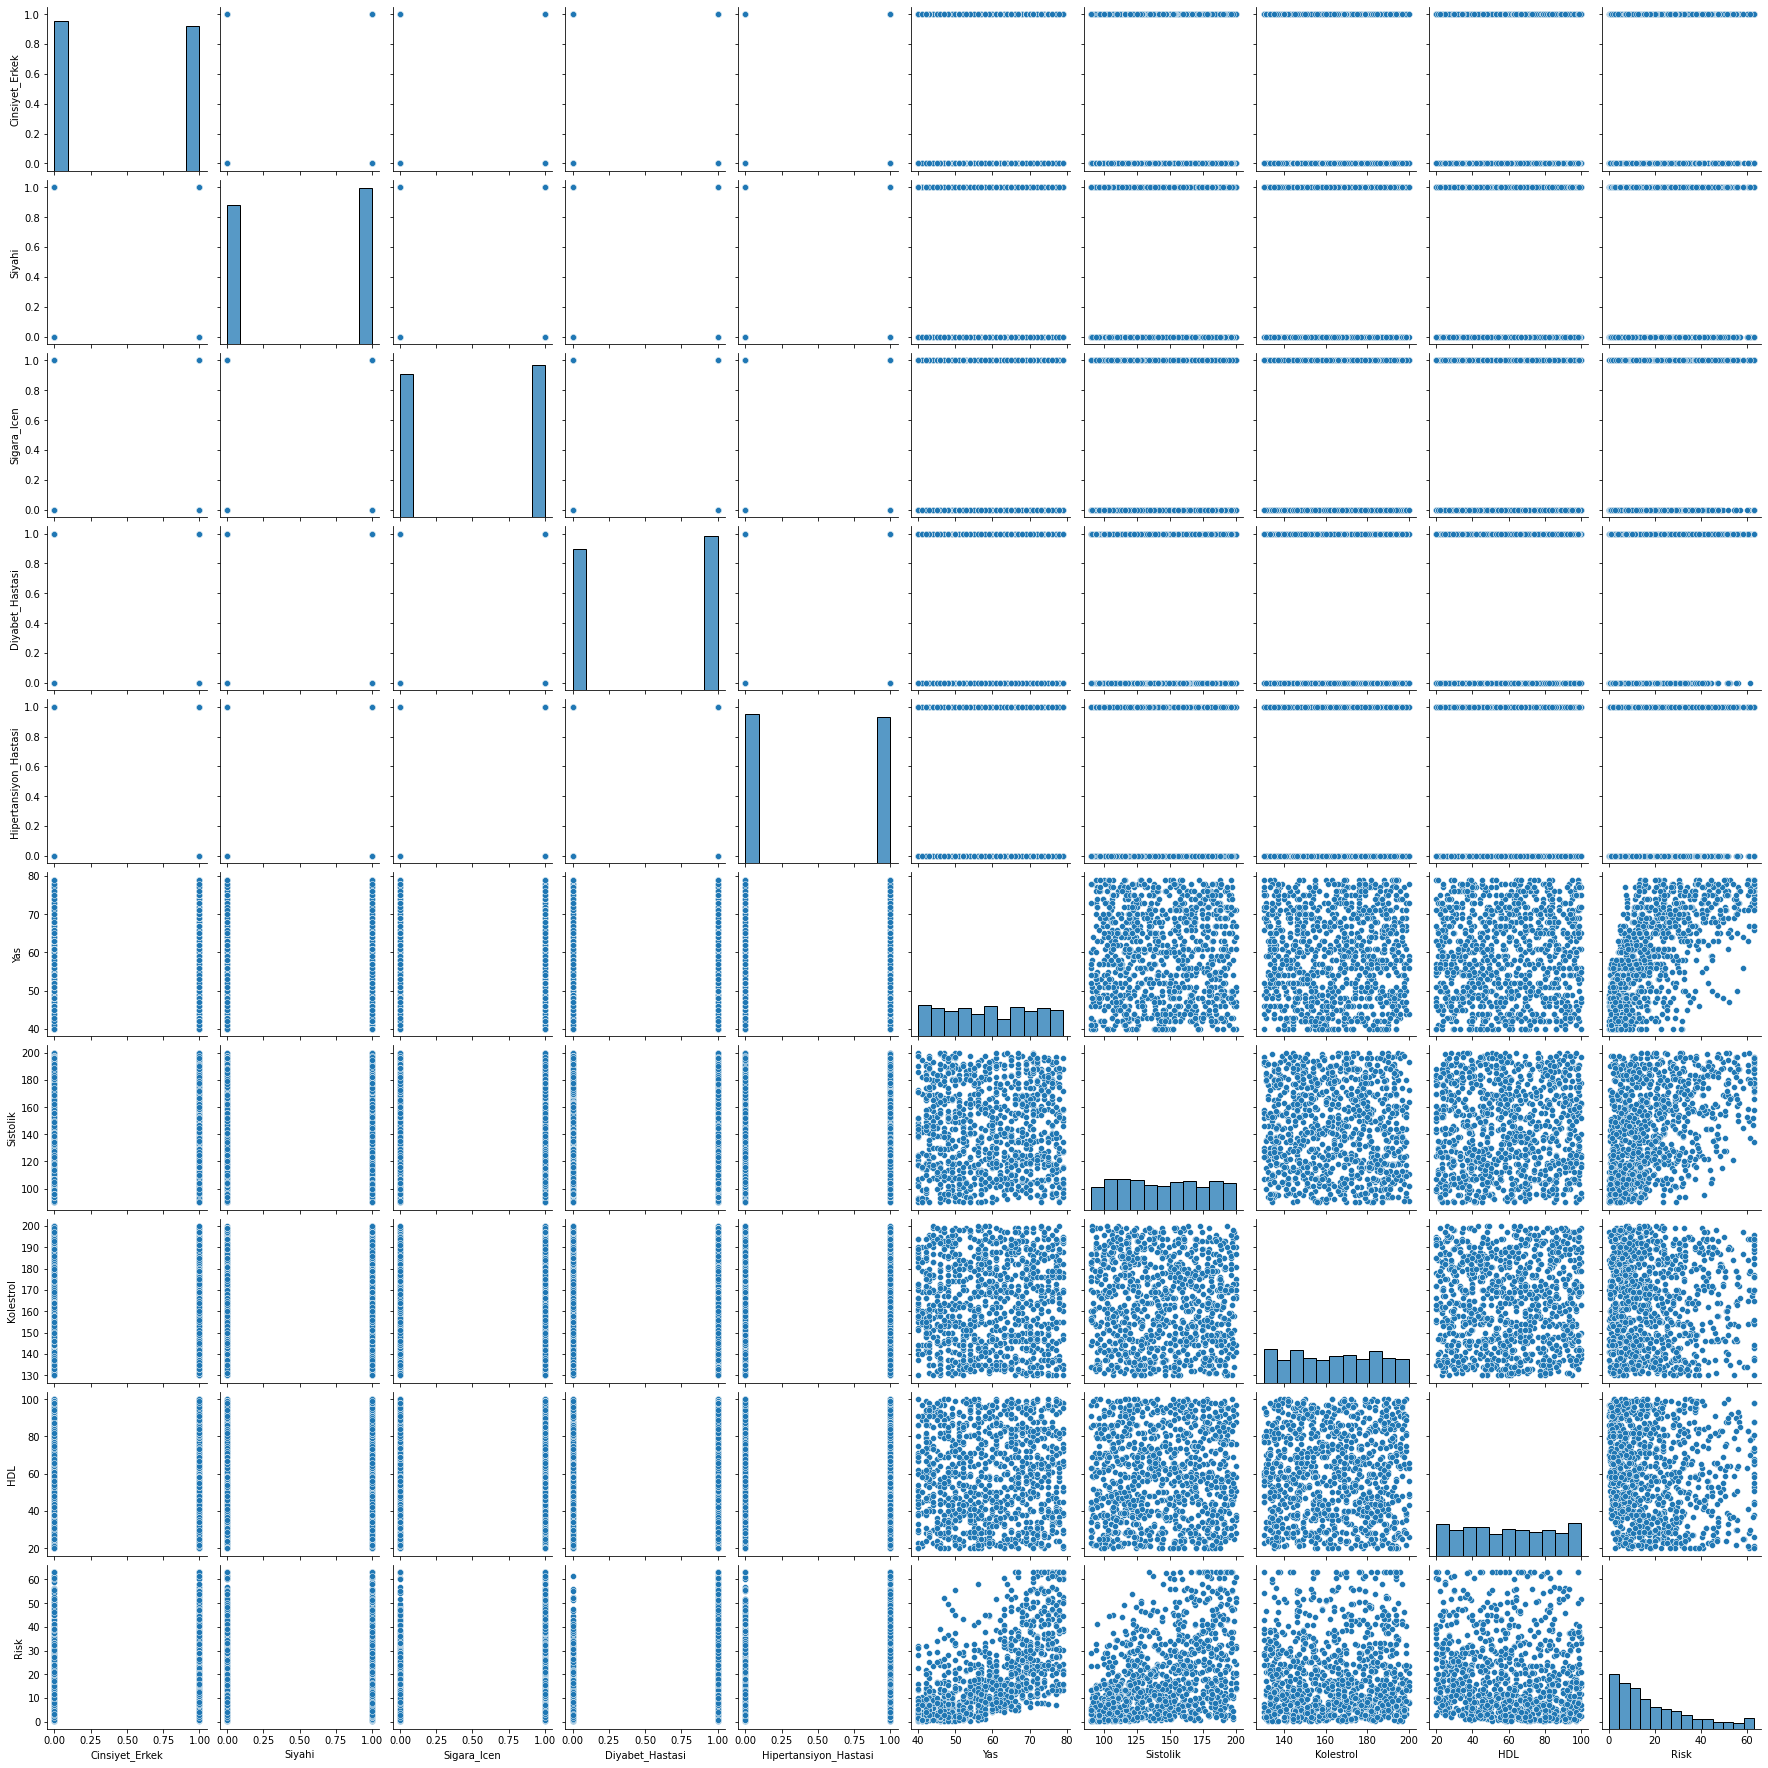

In [ ]:
sns.pairplot(veri_yeni)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
x = veri_donusum_df.drop("Risk", axis=1)
y = veri_donusum_df[['Risk']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

array([-0.36825556])

In [ ]:
lr.coef_

array([[ 0.07702261,  0.04184686,  0.13420237,  0.16666422,  0.07536038,
         0.56068973,  0.35695432,  0.06270641, -0.11791966]])

Regresyon modelimiz:

**ŷ = -0.36 + 0.07(cinsiyet) + 0.041(siyahi) + 0.13(sigara_kullanımı) + 0.16(diyabet) + 0.07(hipertansiyon) + 0.56(yaş) + 0.35(sistolik) + 0.06(kolestrol) + (-0.11)hdl**


Modele baktığımızda değişkenler sabit tutulduğunda;
cinsiyet, ırk, sigara kullanımı, diyabet, hipertansiyon, yaş, sistolik ve kolestrol değişkenleri kalp krizi riskini arttırmaktadır.

Cinsiyet ve ırk değişkenlerine bakıldığında erkek ve siyahi ırktaki insanların kalp krizi riskinin daha fazla olduğu yorumu yapılabilir. 

Ayrıca hdl niteliğinin katsayısının negatif olduğu görülmektedir. Bu da hdlnin (iyi huylu kolestrol) kalp krizi riskinde azaltıcı yönde etkiye sahip olduğu anlamına gelir. 



In [ ]:
y_tahmin = lr.predict(x_test)

In [ ]:
metrics.r2_score(y_test, y_tahmin)

0.79937707343654

In [ ]:
metrics.mean_absolute_error(y_test,y_tahmin)

0.08928446390377888

R2 skor değerimize baktığımızda %79 gibi önemli bir oran görmekteyiz. Bu da bağımsız değişkenlerin bağımlı değişkeni açıklama oranını ifade eder. Yani incelediğimiz bağımsız değişkenler kalp krizi riskini %79 oranında açıklamaktadır.

Mean Absolute Error (Ortalama Mutlak Hata) oranına da baktığımızda %8 olduğunu görebiliriz. Bu oranı artıkların (gerçek değerlerin tahmin değerlerden farkı) oranıdır.

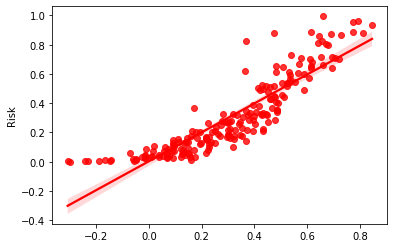

In [ ]:
sns.regplot(x=y_tahmin, y=y_test, color="r")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


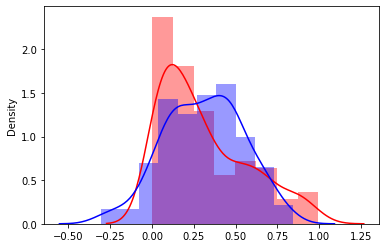

In [ ]:
ax1 = sns.distplot(y_test, hist=True, kde=True, label="Gerçek",color= "red")
sns.distplot(y_tahmin, hist=True, kde=True, label="Tahmin", color="blue", ax=ax1)

**Lasso Regresyon**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
lasso = Lasso()
parametre = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50]}

In [ ]:
lasso_GS = GridSearchCV(lasso, parametre, scoring="r2", cv=5)

In [ ]:
lasso_GS.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   2, 3, 4, 5, 10, 20, 30, 40, 50]},
             scoring='r2')

In [ ]:
lasso_GS.best_estimator_

Lasso(alpha=1e-08)

In [ ]:
capraz_dogrulama =cross_val_score(estimator=lasso_GS.best_estimator_, X= x_train, y= y_train, cv=5)

In [ ]:
capraz_dogrulama.mean()

0.8003034479408363

In [ ]:
capraz_dogrulama.std()

0.02186360604375908

In [ ]:
lasso_tahmin = lasso_GS.best_estimator_.predict(x_test)

In [ ]:
metrics.r2_score(y_test,lasso_tahmin)

0.7993770504075508

In [ ]:
metrics.mean_absolute_error(y_test,lasso_tahmin)

0.08928447317337533

In [ ]:
katsayilar = pd.DataFrame(lasso_GS.best_estimator_.coef_,x_train.columns, columns=["Lasso katsayıları"])

In [ ]:
lasso_GS.best_estimator_.coef_

array([ 0.07702257,  0.04184681,  0.13420233,  0.16666419,  0.07536034,
        0.56068961,  0.35695419,  0.06270628, -0.11791954])

In [ ]:
katsayilar

,Lasso katsayıları
Cinsiyet_Erkek,0.077023
Siyahi,0.041847
Sigara_Icen,0.134202
Diyabet_Hastasi,0.166664
Hipertansiyon_Hastasi,0.075360
Yas,0.560690
Sistolik,0.356954
Kolestrol,0.062706
HDL,-0.117920


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()
parametre = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50]}

In [ ]:
ridge_GS = GridSearchCV(ridge, parametre, scoring="r2", cv=5)

In [ ]:
ridge_GS.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   2, 3, 4, 5, 10, 20, 30, 40, 50]},
             scoring='r2')

In [ ]:
ridge_GS.best_estimator_

Ridge(alpha=0.01)

In [ ]:
ridge_GS.best_estimator_.intercept_

array([-0.36818289])

In [ ]:
ridge_GS.best_estimator_.coef_

array([[ 0.07701664,  0.04184223,  0.13419659,  0.16665886,  0.07535738,
         0.56060995,  0.356901  ,  0.06269564, -0.11789879]])

In [ ]:
capraz_dogrulama_ridge = cross_val_score(estimator=ridge_GS.best_estimator_, X= x_train, y=y_train, cv=5 )

In [ ]:
capraz_dogrulama_ridge.mean()

0.8003049954294044

In [ ]:
ridge_tahmin=ridge_GS.best_estimator_.predict(x_test)

In [ ]:
metrics.r2_score(y_test,ridge_tahmin)

0.7993783258315781

In [ ]:
metrics.mean_absolute_error(y_test, ridge_tahmin)

0.08928505506069306

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic = ElasticNet()
parametre = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50],
             "l1_ratio": [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}


In [ ]:
elastic_GS = GridSearchCV(elastic, parametre, scoring="r2", cv=5)

In [ ]:
elastic_GS.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.224e+00, tolerance: 4.319e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.281e+00, tolerance: 4.642e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   2, 3, 4, 5, 10, 20, 30, 40, 50],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='r2')

In [ ]:
elastic_GS.best_estimator_

ElasticNet(alpha=0.001, l1_ratio=0)

In [ ]:
elastic_tahmin = elastic_GS.best_estimator_.predict(x_test)

In [ ]:
metrics.r2_score(y_test, elastic_tahmin)

0.7993963551626307

In [ ]:
metrics.mean_absolute_error(y_test,elastic_tahmin)

0.08933105449025355

In [ ]:
elastic_GS.best_estimator_.coef_

array([ 0.07654851,  0.04147946,  0.13374097,  0.16623403,  0.07512144,
        0.55437848,  0.3527395 ,  0.06185561, -0.11627235])

Bağımsız değişkenlerin bağımlı değişkenler üzerindeki etkisini araştırmak amacıyla; Linear Regression, Lasso Regressin, Ridge Regression ve Elastic-Net regresyon yöntemleri uygulanmıştır.

Liner Regresyon yönteminin ardından diğer üç regresyon yöntemini uygulamamın nedeni r2 skorlarını karşılaştırmaktır. Bunun yanı sıra anlamlı olmayan parametrelerin tespiti açısından Lasso regresyon oldukça önemli bir yöntemdir. Lasso regresyonu bağımsız değişkenlerim üzerine uyguladığımda tüm parametrelerin modele dahil edildiği sonucuyla karşılaştım. Bu da modelimde anlamsız parametrelerin olmadığı anlamına gelir. 

Kullandığım 4 yöntemde de r2 değerini %79.93 olarak buldum. Güven açısından Lasso regresyon tahminini tercih ederim.

**Görselleştirmeler**

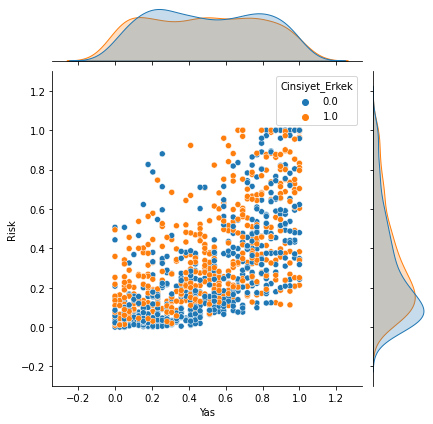

In [ ]:
sns.jointplot(x="Yas", y="Risk", hue="Cinsiyet_Erkek" ,data=veri_donusum_df)
## Yaş arttıkça her iki cinsiyette de kalp krizi görülme riski artmaktadır.

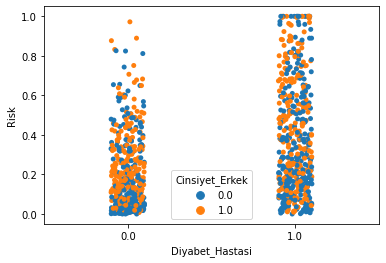

In [ ]:
sns.stripplot(x="Diyabet_Hastasi", y="Risk", hue="Cinsiyet_Erkek", data=veri_donusum_df)
## Veri setimizde daha çok diyabet hastası bulunmaktadır.

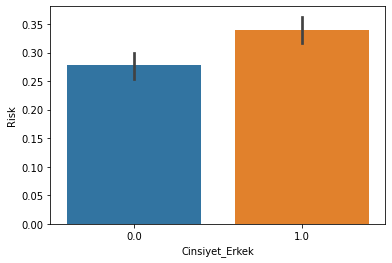

In [ ]:
sns.barplot(x="Cinsiyet_Erkek", y="Risk", data=veri_donusum_df)
## Veri setinde erkeklerle yapılan gözlem daha fazladır

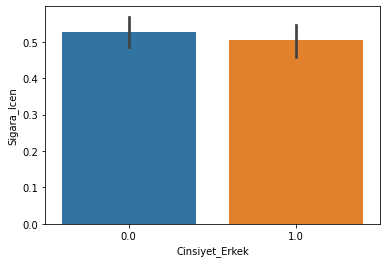

In [ ]:
sns.barplot(x="Cinsiyet_Erkek", y="Sigara_Icen", data=veri_donusum_df)

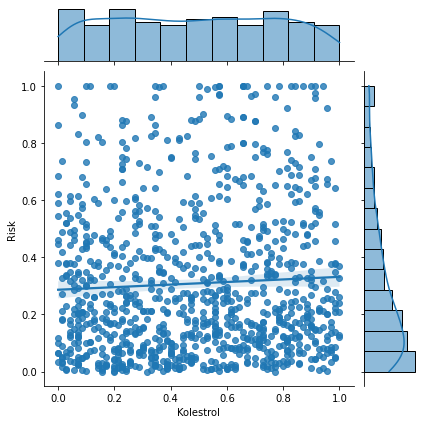

In [ ]:
sns.jointplot(x="Kolestrol", y="Risk", kind="reg" ,data=veri_donusum_df)


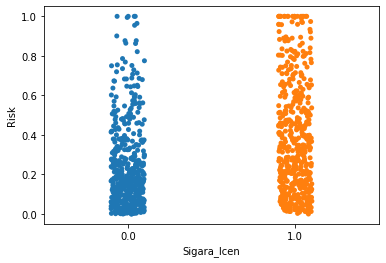

In [ ]:
sns.stripplot(x="Sigara_Icen", y="Risk", data=veri_donusum_df)
## Sigara kullanan bireylerde kalp kalp krizi görülme riski daha fazladır


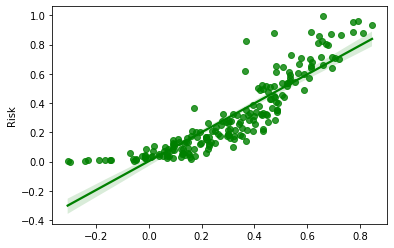

In [ ]:
sns.regplot(x=lasso_tahmin, y=y_test, color="g" )